<h1>Disaster Tweets<h1>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import seaborn as sns
import re, string

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

<h3>Visualisation<h3>

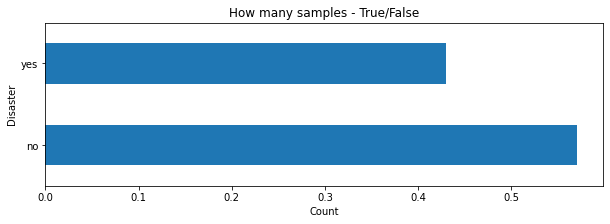

In [3]:
plt.figure(figsize=(10,3))
train_df['target'].value_counts(normalize=True).plot(kind="barh")
plt.title("How many samples - True/False")
plt.xlabel("Count")
plt.ylabel("Disaster")
plt.yticks([1,0],labels=['yes','no'])
plt.show()

In [4]:
# Total Tweets in train and test data
pd.DataFrame.from_dict({"train":[len(train_df)],
                        "test":[len(test_df)]})

,train,test
0,7613,3263


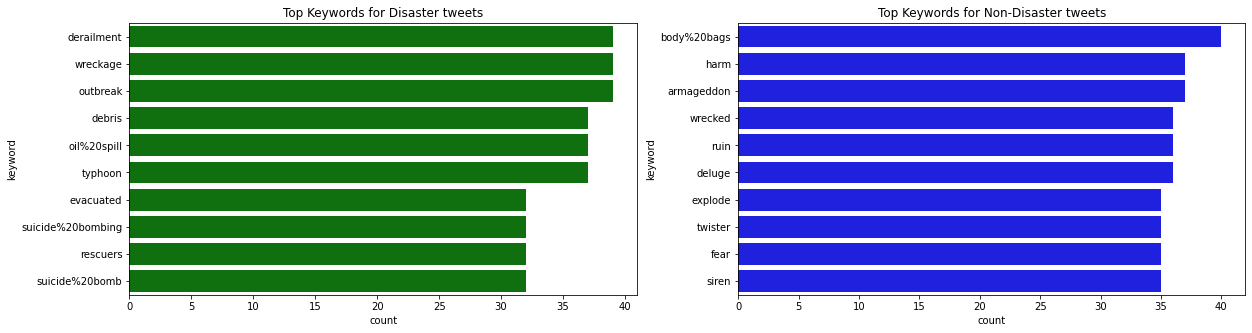

In [5]:
kw_dis = train_df[train_df['target']==1].keyword.value_counts().head(10).reset_index()
kw_nondis = train_df[train_df['target']==0].keyword.value_counts().head(10).reset_index()
kw_dis.columns=["keyword",'count']
kw_nondis.columns=["keyword",'count']
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(data=kw_dis, y='keyword',x='count', color = 'g')
plt.title('Top Keywords for Disaster tweets')

plt.subplot(122)
sns.barplot(data=kw_nondis,y='keyword',x='count', color = 'b')
plt.title('Top Keywords for Non-Disaster tweets')
plt.show()

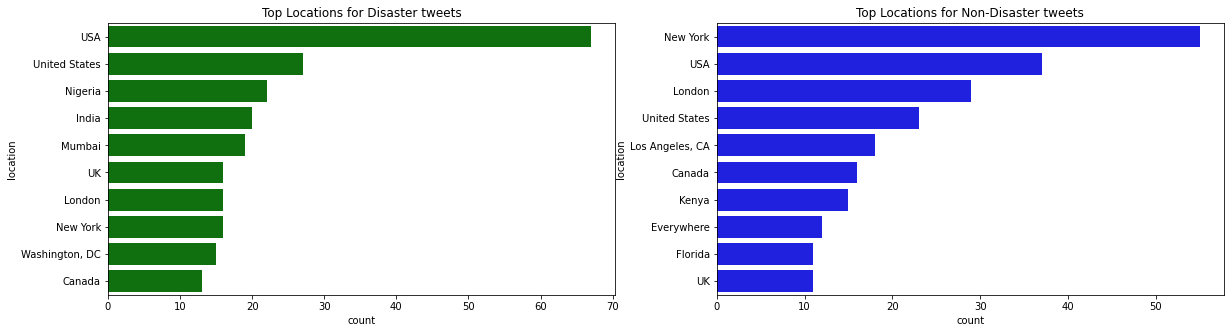

In [6]:
kw_dis = train_df[train_df['target']==1].location.value_counts().head(10).reset_index()
kw_nondis = train_df[train_df['target']==0].location.value_counts().head(10).reset_index()
kw_dis.columns=["location",'count']
kw_nondis.columns=["location",'count']

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(data=kw_dis, y='location',x='count',color = 'g')
plt.title('Top Locations for Disaster tweets')

plt.subplot(122)
sns.barplot(data=kw_nondis, y='location',x='count', color = 'b')
plt.title('Top Locations for Non-Disaster tweets')
plt.show()

<h3>Data tranform<h3>

In [7]:
train_df['text'].head(50)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [8]:
#first part
def remove_links_html(text):
    rem_url = re.sub(r'https?://\S+|www\.\S+','',text) #http/www removal
    rem_html = re.sub((r'<.*?>'),'',rem_url)
    return rem_html

In [9]:
train_df['text'] = train_df['text'].map(lambda line:remove_links_html(line))
test_df['text'] = test_df['text'].map(lambda line:remove_links_html(line))
train_df['text'].head(50)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [10]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [11]:
train_df['text'] = train_df['text'].map(lambda line:remove_links_html(line))
test_df['text'] = test_df['text'].map(lambda line:remove_links_html(line))
train_df['text'].head(50)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [12]:
def special_characters(text):
    rem_atsymbol = re.sub(r'@\S+','',text) #@
    rem_esc = re.sub(r'!','',rem_atsymbol) #!
    rem_hash = re.sub(r'#','',rem_esc) # #removal    
    rem_num = re.sub('[0-9]+', '', rem_hash) # nymbers
    rem_new = re.sub(r'\n',' ', rem_num) # new lines
    rem_tab = re.sub(r'\t',' ', rem_new) # new lines    
   
    return rem_new 

In [13]:
train_df['text'] = train_df['text'].map(lambda line:special_characters(line))
test_df['text'] = test_df['text'].map(lambda line:special_characters(line))
train_df['text'].head(50)

0     Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     , people receive wildfires evacuation orders i...
4     Just got sent this photo from Ruby Alaska as s...
5     RockyFire Update => California Hwy.  closed in...
6     flood disaster Heavy rain causes flash floodin...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    raining flooding Florida TampaBay Tampa  or  d...
13                Flood in Bago Myanmar We arrived Bago
14    Damage to school bus on  in multi car crash BR...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [14]:
def preprocess(text):
    lower = text.lower() #same małe litery
#    signs = re.sub(r'[^\w]', '', lower) #usuwanie znaków specjalnych
#    single = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', lower) #usuwanie pojedyńczych liter
    rem_space = re.sub(' +',' ',lower) # more than one space
    return rem_space

In [15]:
train_df['text'] = train_df['text'].map(lambda line:preprocess(line))
test_df['text'] = test_df['text'].map(lambda line:preprocess(line))
train_df['text'].head(50)

0     our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask. canada
2     all residents asked to 'shelter in place' are ...
3     , people receive wildfires evacuation orders i...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update => california hwy. closed in ...
6     flood disaster heavy rain causes flash floodin...
7     i'm on top of the hill and i can see a fire in...
8     there's an emergency evacuation happening now ...
9     i'm afraid that the tornado is coming to our a...
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah- wait ...
12    raining flooding florida tampabay tampa or day...
13                flood in bago myanmar we arrived bago
14    damage to school bus on in multi car crash bre...
15                                       what's up man?
16                                        i love fruits
17                                     summer is

In [16]:
#Alternative
#Shuffle data to avoid bias
#train_df = train_df.sample(frac=1, random_state=42)
#train_df_cp =train_df.copy()
#def applying
#transform_methods = [remove_links_html,remove_emoji, special_characters, preprocess, lambda x: x.lower()]
#for transform_method in transform_methods:
#    train_df['text'] = train_df['text'].apply(transform_method)

<h1>Logistic regression on TFIDF<h1>

In [17]:
#Regresja logistyczna – gdy zmienna zależna jest na skali dychotomicznej (przyjmuje tylko dwie wartości).
#Formalnie model regresji logistycznej jest uogólnionym modelem liniowym (GLM), w którym użyto logitu jako funkcji wiążącej.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #,CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
from sklearn.metrics import plot_confusion_matrix

In [19]:
X_train, X_val, y_train, y_val = train_test_split(train_df.text, train_df.target, test_size=0.1, random_state=1)

In [20]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word', #You can also try 'char' / 'word'
                            stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

In [21]:
X_train_vect = vect_word.fit_transform(X_train)
X_val_vect = vect_word.transform(X_val)
X_test_vect = vect_word.transform(test_df['text'])


In [22]:
model_0 = LogisticRegression(random_state = 1)
model_0.fit(X_train_vect, y_train)

LogisticRegression(random_state=1)

<h3>Validation<h3>

In [23]:
print(confusion_matrix(y_val, model_0.predict(X_val_vect)))

[[398  40]
 [108 216]]


C:\Users\E530\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


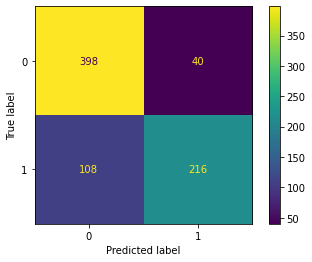

In [24]:
plot_confusion_matrix(model_0, X_val_vect, y_val)

In [25]:
sample_submission["target"] = model_0.predict(vect_word.transform(test_df.text))
sample_submission.to_csv("submission_log_reg.csv", index=False)

In [26]:
print(classification_report(y_val, model_0.predict(X_val_vect)))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       438
           1       0.84      0.67      0.74       324

    accuracy                           0.81       762
   macro avg       0.82      0.79      0.79       762
weighted avg       0.81      0.81      0.80       762



Text(0.5, 1.0, 'Reciever Operating Characteristic')

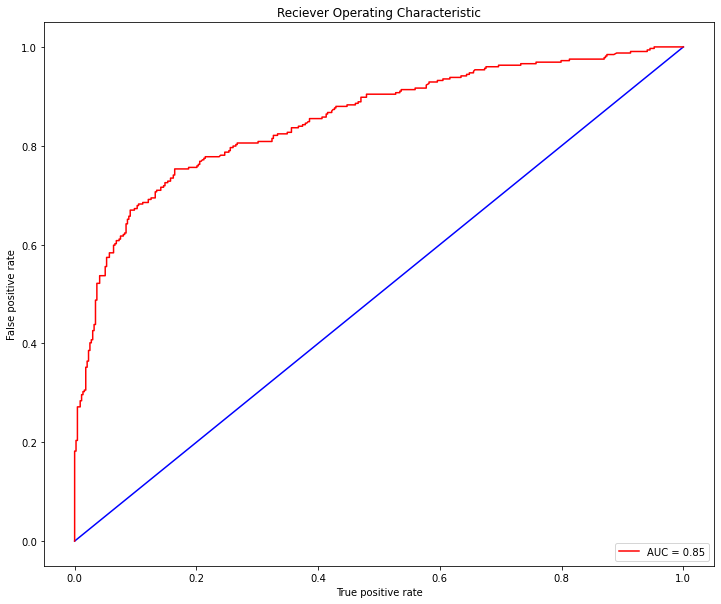

In [27]:
frp,trp,thres = roc_curve(y_val,model_0.predict_proba(X_val_vect)[:,1])
auc_val = auc(frp,trp)
plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

<h3>model implementation<h3>

In [28]:
#implementacja modelu, wynik końcowy
sample_submission["target"] = model_0.predict(X_test_vect)
sample_submission.to_csv("submission_log_reg.csv", index=False)

<h1>Simple CNN<h1>

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [30]:
N = 1000
tokenizer = Tokenizer(num_words=N, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_mat = tokenizer.texts_to_sequences(X_train)
X_train_mat = pad_sequences(X_train_mat, maxlen=100)



model_1 = Sequential()
model_1.add(Embedding(N, 128, input_length=X_train_mat.shape[1]))
model_1.add(Conv1D(128, 5, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [31]:
X_train_mat

array([[  0,   0,   0, ...,  18,  13,  12],
       [  0,   0,   0, ...,   8,  19, 161],
       [  0,   0,   0, ..., 797,   1,  47],
       ...,
       [  0,   0,   0, ..., 959,   9, 176],
       [  0,   0,   0, ...,  76,   4,  22],
       [  0,   0,   0, ...,  48,  17, 696]])

In [32]:
epochs = 4
batch_size = 64

history = model_1.fit(X_train_mat, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/4
97/97 [==============================] - 19s 182ms/step - loss: 0.5727 - binary_accuracy: 0.7069 - val_loss: 0.4615 - val_binary_accuracy: 0.7915
Epoch 2/4
97/97 [==============================] - 17s 178ms/step - loss: 0.4101 - binary_accuracy: 0.8190 - val_loss: 0.4547 - val_binary_accuracy: 0.7930
Epoch 3/4
97/97 [==============================] - 19s 197ms/step - loss: 0.3527 - binary_accuracy: 0.8496 - val_loss: 0.4757 - val_binary_accuracy: 0.7784
Epoch 4/4
97/97 [==============================] - 17s 177ms/step - loss: 0.3131 - binary_accuracy: 0.8741 - val_loss: 0.4816 - val_binary_accuracy: 0.7988


<h3>model implementation<h3>

In [33]:
sample_submission["target"] = model_1.predict(pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=100))

102/102 [==============================] - 3s 33ms/step


In [34]:
sample_submission["target"].head()

0    0.732009
1    0.885392
2    0.833255
3    0.250361
4    0.991084
Name: target, dtype: float32

In [35]:
#zamiana prawdopodobieństw na 0/1
sample_submission["target"] = sample_submission["target"].apply(lambda x : 1 if x>=0.5 else 0)
sample_submission["target"] = sample_submission["target"].astype(int)
sample_submission["target"].head()

0    1
1    1
2    1
3    0
4    1
Name: target, dtype: int32

In [36]:
sample_submission.to_csv("submission_simple.csv", index=False)

<h1>No simple CNN/RNN<h1>

In [37]:
model_2 = Sequential()
model_2.add(Embedding(N, 128, input_length=X_train_mat.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Conv1D(filters=64,kernel_size=5, activation='relu', padding="valid", strides = 1))
model_2.add(MaxPooling1D(pool_size=4))
model_2.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [38]:
epochs = 8
batch_size = 64
model_2.fit(X_train_mat, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/8
97/97 [==============================] - 34s 304ms/step - loss: 0.6073 - binary_accuracy: 0.6650 - val_loss: 0.4883 - val_binary_accuracy: 0.7857
Epoch 2/8
97/97 [==============================] - 43s 439ms/step - loss: 0.4236 - binary_accuracy: 0.8096 - val_loss: 0.4676 - val_binary_accuracy: 0.7945
Epoch 3/8
97/97 [==============================] - 41s 423ms/step - loss: 0.3726 - binary_accuracy: 0.8380 - val_loss: 0.4671 - val_binary_accuracy: 0.7930
Epoch 4/8
97/97 [==============================] - 37s 379ms/step - loss: 0.3433 - binary_accuracy: 0.8545 - val_loss: 0.4959 - val_binary_accuracy: 0.7872
Epoch 5/8
97/97 [==============================] - 37s 384ms/step - loss: 0.3058 - binary_accuracy: 0.8756 - val_loss: 0.5188 - val_binary_accuracy: 0.7930
Epoch 6/8
97/97 [==============================] - 37s 382ms/step - loss: 0.2647 - binary_accuracy: 0.8952 - val_loss: 0.5676 - val_binary_accuracy: 0.7930
Epoch 7/8
97/97 [==============================] - 40s 409ms/ste

<h3>model implementation<h3>

In [39]:
sample_submission["target"] = model_2.predict(pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=100))

102/102 [==============================] - 8s 53ms/step


In [40]:
sample_submission["target"].head()

0    0.582216
1    0.518563
2    0.993248
3    0.290486
4    0.999913
Name: target, dtype: float32

In [41]:
sample_submission["target"] = sample_submission["target"].apply(lambda x : 1 if x>=0.5 else 0)
sample_submission["target"] = sample_submission["target"].astype(int)
sample_submission["target"].head()

0    1
1    1
2    1
3    0
4    1
Name: target, dtype: int32

In [42]:
sample_submission.to_csv("submission_not_simple.csv", index=False)

<h1>Ridge regression on Count vectorizer (tokken counts)<h1>

In [43]:
#Regresja grzbietowa jest specyficznym rodzajem regresji, który obejmuje regularyzację.
#Jedyną różnicą między zwykłą regresją najmniejszych kwadratów a regresją grzbietową jest funkcja błędu
#- regresja grzbietowa uznaje wielkość współczynników regresji za część składową błędu,
#co zachęca do niewielkich współczynników. W tym przykładzie popycha to nachylenie i przechwytuje w kierunku zera.
#Oprócz zmiany naszej funkcji błędu, jedyną dodatkową złożonością działania regresji grzbietu jest to,
#że musimy teraz dołączyć dodatkowy parametr lambda, który decyduje między znaczeniem minimalizacji błędu
#kwadratu naszych prognoz a minimalizacją wartości a i b"""

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer #,TfidfVectorizer

In [45]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [46]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

In [47]:
model_3 = linear_model.RidgeClassifier()
model_3.fit(train_vectors, train_df["target"])

RidgeClassifier()

<h3>cross validation<h3>

In [48]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)
f1=list(model_selection.cross_val_score(model_3, train_vectors, train_df["target"], cv=kf, scoring="f1"))
accuracy=list(model_selection.cross_val_score(model_3, train_vectors, train_df["target"], cv=kf, scoring='accuracy'))
recall=list(model_selection.cross_val_score(model_3, train_vectors, train_df["target"], cv=kf, scoring='recall'))
print('F1',f1,'\n','acc',accuracy,'\n','rec',recall)

F1 [0.7115384615384617, 0.7052810902896082, 0.7351097178683387, 0.7323272438443208, 0.7509462528387585] 
 acc [0.7721602101116218, 0.7701904136572554, 0.7813525935653316, 0.7687253613666228, 0.7930354796320631] 
 rec [0.680365296803653, 0.6537867078825348, 0.7022222222222222, 0.7184615384615385, 0.6947040498442367]


<h3>model implementation<h3>

In [49]:
#implementacja modelu, wynik końcowy
sample_submission["target"] = model_3.predict(test_vectors)
sample_submission.to_csv("submission_linear.csv", index=False)

<h1>Multinomial Naive Bayes Classifier<h1>

In [50]:
#Naiwne algorytmy Bayesa to technika klasyfikacji oparta na zastosowaniu twierdzenia Bayesa przy silnym założeniu,
#że wszystkie predyktory są od siebie niezależne. W prostych słowach założenie jest takie,
#że obecność cechy w klasie jest niezależna od obecności jakiejkolwiek innej cechy w tej samej klasie.
#
#Gaussian Naive Bayes - zakłada, że dane z każdej etykiety pochodzą z prostego rozkładu Gaussa.
#
#Wielomianowy Naive Bayes - (Multinomial) zakłada że cechy pochodzą z prostego rozkładu wielomianowego.
#Ten rodzaj Naiwnych Bayesów jest najbardziej odpowiedni dla cech reprezentujących dyskretne liczby.
#
#Bernoulli Naive Bayes - zakłada że cechy są binarne (0 i 1).
#Klasyfikacja tekstu za pomocą modelu „worka słów” może być wynikiem zastosowania Bernoulliego Naïve Bayesa.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_df.text, train_df.target, test_size=0.1, random_state=1)

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.1,  0.2, 0.5,1.0, 1.5, 10]}
vectorizer = TfidfVectorizer()
vextori_text = vectorizer.fit_transform(X_train)

bernoulli_nb_grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(vextori_text,y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(vextori_text, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(vectorizer.transform(X_test), y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Train Accuracy : 0.897
Test Accuracy : 0.812
Best Accuracy Through Grid Search : 0.800
Best Parameters :  {'alpha': 0.5}


In [54]:
# tfidf - convert words to number using tfidf
model_5 = Pipeline([("tfidf", TfidfVectorizer( )),("clf", MultinomialNB(alpha=0.5))])
model_5.fit(X_train.to_numpy(), y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', MultinomialNB(alpha=0.5))])

In [55]:
#evaluate
baseline_score = model_5.score(X_test, y_test)
print(f"Our baseline model achieves accuracy of {baseline_score*100:.2f}%|")

Our baseline model achieves accuracy of 81.23%|


In [56]:
from pandas.compat.numpy.function import process_skipna
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(model,y_true, y_pred):

#  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
#  Args:
#  -----
#  y_true = true labels in the form of a 1D array
#  y_pred = predicted labels in the form of a 1D array
#  Returns a dictionary of accuracy, precision, recall, f1-score.
  
  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1score , _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"model": [model],"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1score":[f1score],}
  return model_results

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y_test, model_name):    
    pred_classes =   ['NotDisaster','Disaster']    
    cm = confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=pred_classes,
                yticklabels=pred_classes)
    plt.title(f'{model_name} Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

In [57]:
#measure
y_pred=model_5.predict(X_test)
model_results = calculate_results("multinomialNB",y_test,model_5.predict(X_test))
pd.DataFrame.from_dict(model_results)


,model,accuracy,precision,recall,f1score
0,multinomialNB,0.812336,0.818129,0.812336,0.808005


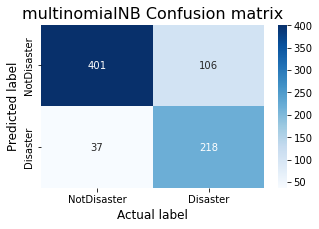

In [58]:
plot_confusion_matrix( y_pred, y_test, "multinomialNB")

<h3>model implementation<h3>

In [59]:
#implementacja modelu, wynik końcowy
sample_submission["target"] = model_5.predict(test_df.text.to_numpy())
sample_submission.to_csv("submission_bayas.csv", index=False)